# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 08__

__Nombres de los estudiantes: Lubin Ye y Ziteng Huang__

In [1]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [2]:
import pandas as pd

"""

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

"""

df = pd.read_csv('/content/drive/MyDrive/Colab/P2/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
# Obtenemos la descripción de las variables (medias, desviaciones típicas, rangos, ...)
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
# Obtenemos la correlación entre las variables numericas

df.corr()

# Podemos comentar que la correlación es una medida estadística que describe la relación entre dos variables.
# Los valores de la matriz de correlación varían entre -1 y 1:
# 1: Correlación positiva perfecta, son directamente proporcionales.
# 0: No hay correlación.
# -1: Correlación negativa perfecta, son inversamente proporcionales.

<ipython-input-7-92927acb6448>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
# Utilizamos y=1.02 para asegurarnos de que el título superior no se superponga con los subgráficos y esté ligeramente separado de ellos.
plt.suptitle('Diagrama de Dispersión de Variables Numéricas', y=1.02)
plt.show()

# Este diagrama de dispersión nos muestra cómo cambia una variable en función de otra, permitiendo identificar patrones, tendencias y posibles correlaciones entre ellas
# Por ejemplo, vemos que la longitud y la latitud están inversante relacionadas, ya que mientras la latitud aumenta (norte), la longitud disminuye (oeste), es decir, son inversamente proporcionales
# Luego, podemos mencionar las siguientes variables que son directamente proporcionales:
# 1. Numero total de habitaciones - Numero de total de dormitorios
# 2. Population - households
# 3. Households - Numero total de habitaciones

# En el resto de variables, es difícil establecer algún tipo de correlación ya que en su mayoría o bien se da el caso de datos variopintos en donde hay valores muy distintos de todo tipo para ambas variables, lo cual no permite establecer ninguna correlación o para cualquier valor de una variable,
# el valor de la otra variable se mantiene mas o menos constante, es el caso de population - latitude, population - longitude, population - median_income, population - median-house-value

Output hidden; open in https://colab.research.google.com to view.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

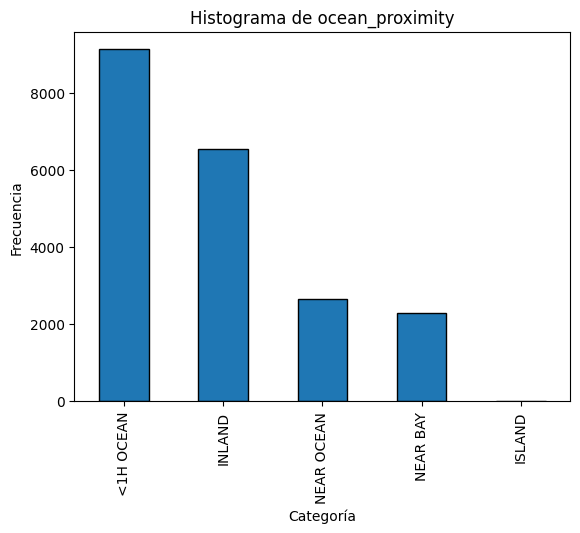

In [ ]:
import matplotlib.pyplot as plt

# Obtenemos la columna 'ocean_proximity' del DataFrame df
df['ocean_proximity'].value_counts().plot(kind='bar', edgecolor='black')

plt.title('Histograma de ocean_proximity')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

# Vemos que el valor '<1H OCEAN' es el de mayor frecuencia por lo que deducimos que influye en los resultados

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [ ]:
# Prueba 1

# Vamos a prescindir de aquellas variables que no tengan una gran correlación (valor cercanos a 0) entre sí, ya que suponemos que no van a afectar a la gráfica de dispersión

# Vamos a eliminar aquellas variables que no tienen correlación con el resto, ya que estas no influirán a la hora de hacer el clustering vamos a quitar todas aquellas con un coeficiente de correlación tal que |coe| < 0.6
from sklearn.preprocessing import StandardScaler

# Dejamos solo las variables que tienen correlación entre sí
subset_cols = ['longitude','latitude','total_rooms','total_bedrooms','population','households']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Vamos a preprocesar los datos mediante estandarización usando StandardScaler para transformar los datos para que tengan una media de cero y una desviación estándar de uno y que estén a la misma escala
# ya que hay datos con una magnitud mucho mayor que podría influir de forma desproporcional en el diagrama de dispersión
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Convertir los datos preprocesados en un nuevo DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=subset_cols)
df_scaled.fillna(0, inplace=True)

# Mostrar el nuevo DataFrame con los datos preprocesados
print(df_scaled)


       longitude  latitude  total_rooms  total_bedrooms  population  \
0      -1.327835  1.052548    -0.804819       -0.970325   -0.974429   
1      -1.322844  1.043185     2.045890        1.348276    0.861439   
2      -1.332827  1.038503    -0.535746       -0.825561   -0.820777   
3      -1.337818  1.038503    -0.624215       -0.718768   -0.766028   
4      -1.337818  1.038503    -0.462404       -0.611974   -0.759847   
...          ...       ...          ...             ...         ...   
20635  -0.758826  1.801647    -0.444985       -0.388895   -0.512592   
20636  -0.818722  1.806329    -0.888704       -0.920488   -0.944405   
20637  -0.823713  1.778237    -0.174995       -0.125472   -0.369537   
20638  -0.873626  1.778237    -0.355600       -0.305834   -0.604429   
20639  -0.833696  1.750146     0.068408        0.185416   -0.033977   

       households  
0       -0.977033  
1        1.669961  
2       -0.843637  
3       -0.733781  
4       -0.629157  
...           ...  
20635  

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número óptimo de clusters: 3


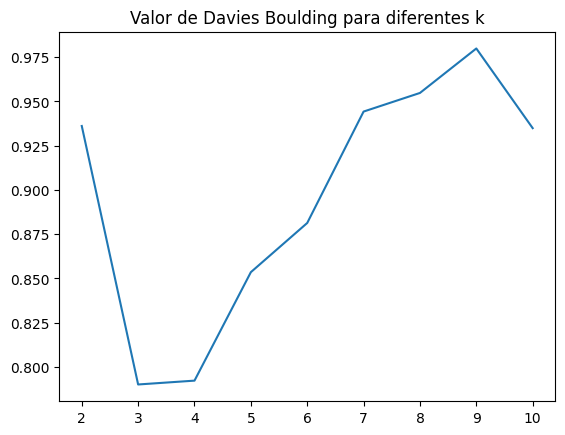

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Definimos el rango de número de clusters entre 2 y 10, ya que no nos interea tener un numero excesivo de clusters
k_range = range(2, 11)

# Lista para almacenar los resultados del índice davies_bouldin
db_scores = []

# Iterar sobre el rango de número de clusters
for k in k_range:
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(df_scaled)

    # Calcular el índice davies_bouldin y almacenarlo en la lista
    db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
    db_scores.append(db_score)

plt.plot(k_range, db_scores)
plt.title("Valor de Davies Boulding para diferentes k")

# Encontrar el número óptimo de clusters con el índice más bajo
optimal_clusters = k_range[db_scores.index(min(db_scores))]
print("Número óptimo de clusters:", optimal_clusters)


## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['longitude', 'latitude', 'median_income', 'median_house_value']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos si es necesario
# En este caso, suponemos que los datos ya están escalados

# Inicializar y ajustar el modelo KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_scaled)

# Asignar las etiquetas de clusters al conjunto de datos original
df['cluster_label'] = kmeans.labels_

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    cluster_stats = cluster_data[subset_cols].describe()

    # Mostrar la tabla de descriptores estadísticos para cada cluster
    print(f"\nCluster {label} - Descriptores Estadísticos:")
    print(cluster_stats)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 2 - Descriptores Estadísticos:
         longitude     latitude  median_income  median_house_value
count  8120.000000  8120.000000    8120.000000         8120.000000
mean   -121.722964    37.968264       3.778460       195841.038177
std       0.895976     0.979263       1.873042       118207.492906
min    -124.350000    35.100000       0.499900        14999.000000
25%    -122.280000    37.390000       2.507400       100000.000000
50%    -121.950000    37.790000       3.423850       163900.000000
75%    -121.290000    38.440000       4.635400       262025.000000
max    -118.450000    41.950000      15.000100       500001.000000

Cluster 0 - Descriptores Estadísticos:
         longitude     latitude  median_income  median_house_value
count  1608.000000  1608.000000    1608.000000         1608.000000
mean   -119.192376    35.268787       4.154014       221957.942164
std       1.958909     1.942687       1.751541       107902.539462
min    -123.220000    32.550000       0.677500   

In [ ]:
# Contextualización de los datos

# Vemos que dentro de los mismos descriptores estadisticos entre los 3 clusters tienen valores relativamente parecidos. No obstante, cabe recalcar ciertas diferencias entre estos 3 grupos:
# En cuanto al ingreso medio (median_income) de los 3 clusters, el cluster 0 parece tener el valor medio más alto, este hecho está directamente correlacionado con el valor medio de la casa (median_house_value),
# lo cual tiene sentido ya que si el poder adquisitvo es mayor, mayor será el valor de la casa.
# En cuanto a los 2 otros clusters, vemos que el cluster 1 es el siguente con valor medio de median_income más alto y a continuación vendría el cluster 2.
# Esto nos puede dar a pensar que estos datos (median_income y median_house_value) pueden estar indirectamente relacionados por la zona de la ciudad o de residencia determinadas por longitude y latitude que definen
# la correspondencia de coordenadas de la ubicación de la casa en cuestión.
# De ello, extraemos que las casas ubicadas al oeste (longitude) y al norte (latitude) tiene un valor mayor que aquellas que estén al este y al sur.


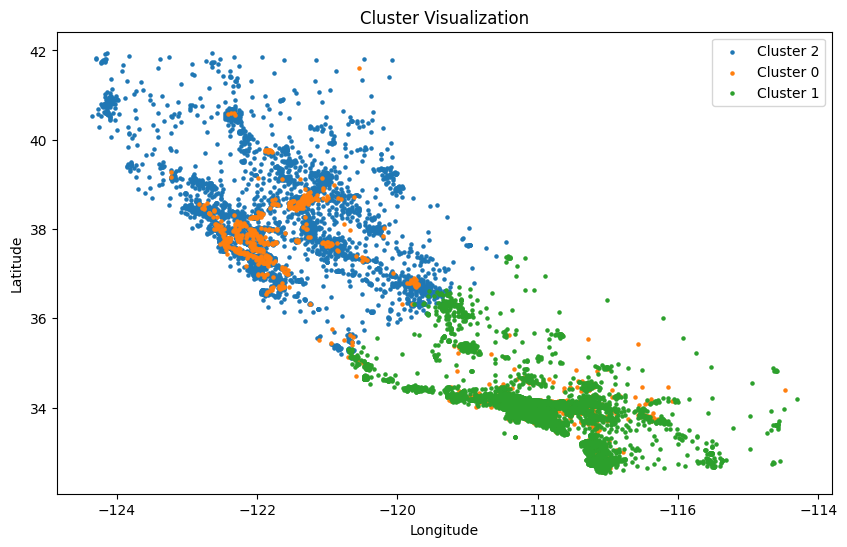

In [ ]:
# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}', s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

In [ ]:
# Mediante la visualización de estos datos en la gráfica de dispersión, vemos que los datos apuntan a que si las casas están en la zona centro al oeste y al norte,
# las casas tienen un valor medio más alto que el restos de casas y sus popietarios tienen un mayor ingreso medio que el resto. Esto es, el cluster 0.

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



In [ ]:
# Comentario sobre los resultados:

# Vemos que el uso de emplear clustering jerarquico aglomerativo nos da un resultado muy similar a usar el algoritmo de k-Means, lo cual
# es coherente ya que dado el mismo numero de clusters optimo y la misma entrada de datos, los resultados deben de ser similares

# En cuanto al dendograma, podemos comentar que al elegir nº optimo de clusters = 3 a partir del algoritmo del apartado 4) del indice de Davies-Bouldin, vemos
# que dentro del cluster 1 hay un salto considerable a las 2 agrupaciones anteriores que se ve reflejado en el dendograma (una distancia aproximada de 75)
# por tanto, a lo mejor se podría reajustar el numero de clusters a 4 para evitar ese salto de magnitud considerable


<ipython-input-9-7bf92be36c30>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.fillna(0, inplace=True)


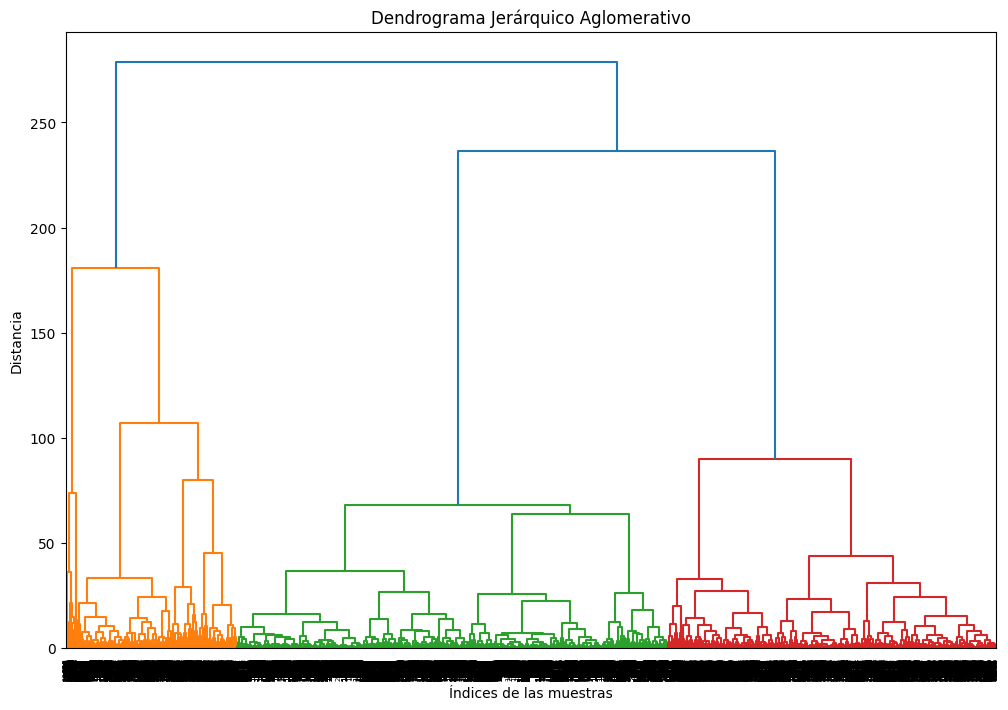

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['longitude','latitude','total_rooms','total_bedrooms','population','households']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Para evitar los valores perdidos (NaN), decidimos asignar 0 como variable cuantitativa
df_subset.fillna(0, inplace=True)

# Preprocesar los datos: estandarización usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Realizar clustering jerárquico aglomerativo
linkage_matrix = linkage(scaled_data, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma Jerárquico Aglomerativo')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')
plt.show()



Cluster 3 - Descriptores Estadísticos:
         longitude     latitude  median_income  median_house_value
count  7265.000000  7265.000000    7265.000000         7265.000000
mean   -121.829533    38.025334       3.816676       201171.604955
std       0.804640     1.030084       1.888361       117443.302880
min    -124.350000    33.760000       0.499900        14999.000000
25%    -122.290000    37.500000       2.537000       107400.000000
50%    -121.990000    37.810000       3.464300       170600.000000
75%    -121.370000    38.520000       4.669400       265300.000000
max    -117.340000    41.950000      15.000100       500001.000000

Cluster 1 - Descriptores Estadísticos:
         longitude     latitude  median_income  median_house_value
count  3811.000000  3811.000000    3811.000000         3811.000000
mean   -118.842089    34.854812       4.031531       221995.109945
std       1.836484     1.808790       1.783797       108129.253841
min    -124.190000    32.550000       0.677500   

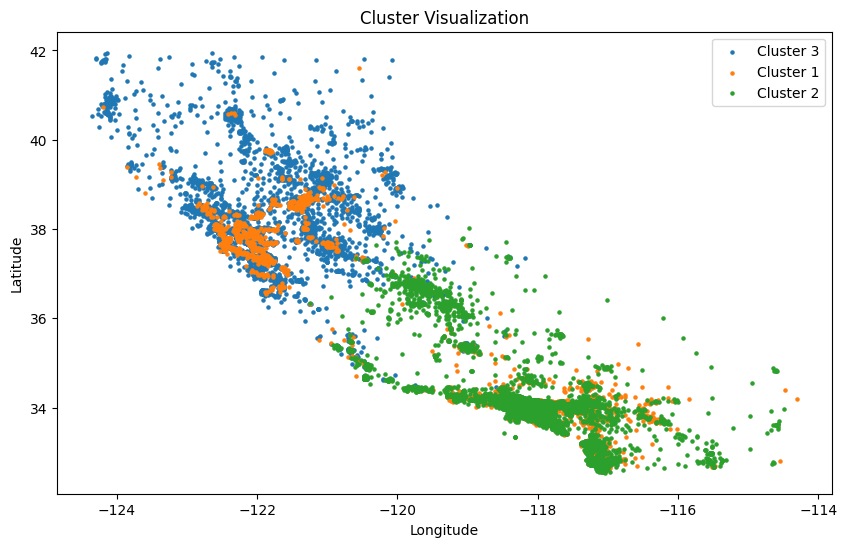

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Obtener las etiquetas de cluster para cada muestra
cluster_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Agregar las etiquetas de cluster al dataframe original
df['cluster_label'] = cluster_labels

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    cluster_stats = cluster_data[subset_cols].describe()

    # Mostrar la tabla de descriptores estadísticos para cada cluster
    print(f"\nCluster {label} - Descriptores Estadísticos:")
    print(cluster_stats)

# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}', s= 5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()
